In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Data Analysis**

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female
age,80.0,54.0,28.0,36.0,76.0,20.0,44.0,79.0,42.0,32.0
hypertension,0,0,0,0,1,0,0,0,0,0
heart_disease,1,0,0,0,1,0,0,0,0,0
smoking_history,never,No Info,never,current,current,never,never,No Info,never,never
bmi,25.19,27.32,27.32,23.45,20.14,27.32,19.31,23.86,33.64,27.32
HbA1c_level,6.6,6.6,5.7,5.0,4.8,6.6,6.5,5.7,4.8,5.0
blood_glucose_level,140,80,158,155,155,85,200,85,145,100
diabetes,0,0,0,0,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

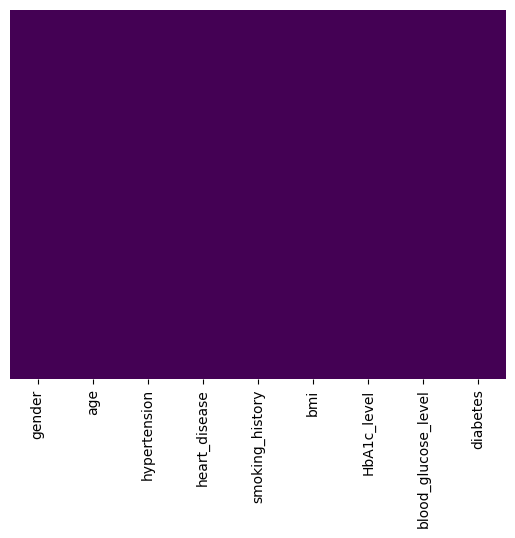

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
#cbar is for the legend that comes on the side
#no null values

In [8]:
df.duplicated().sum()

3854

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

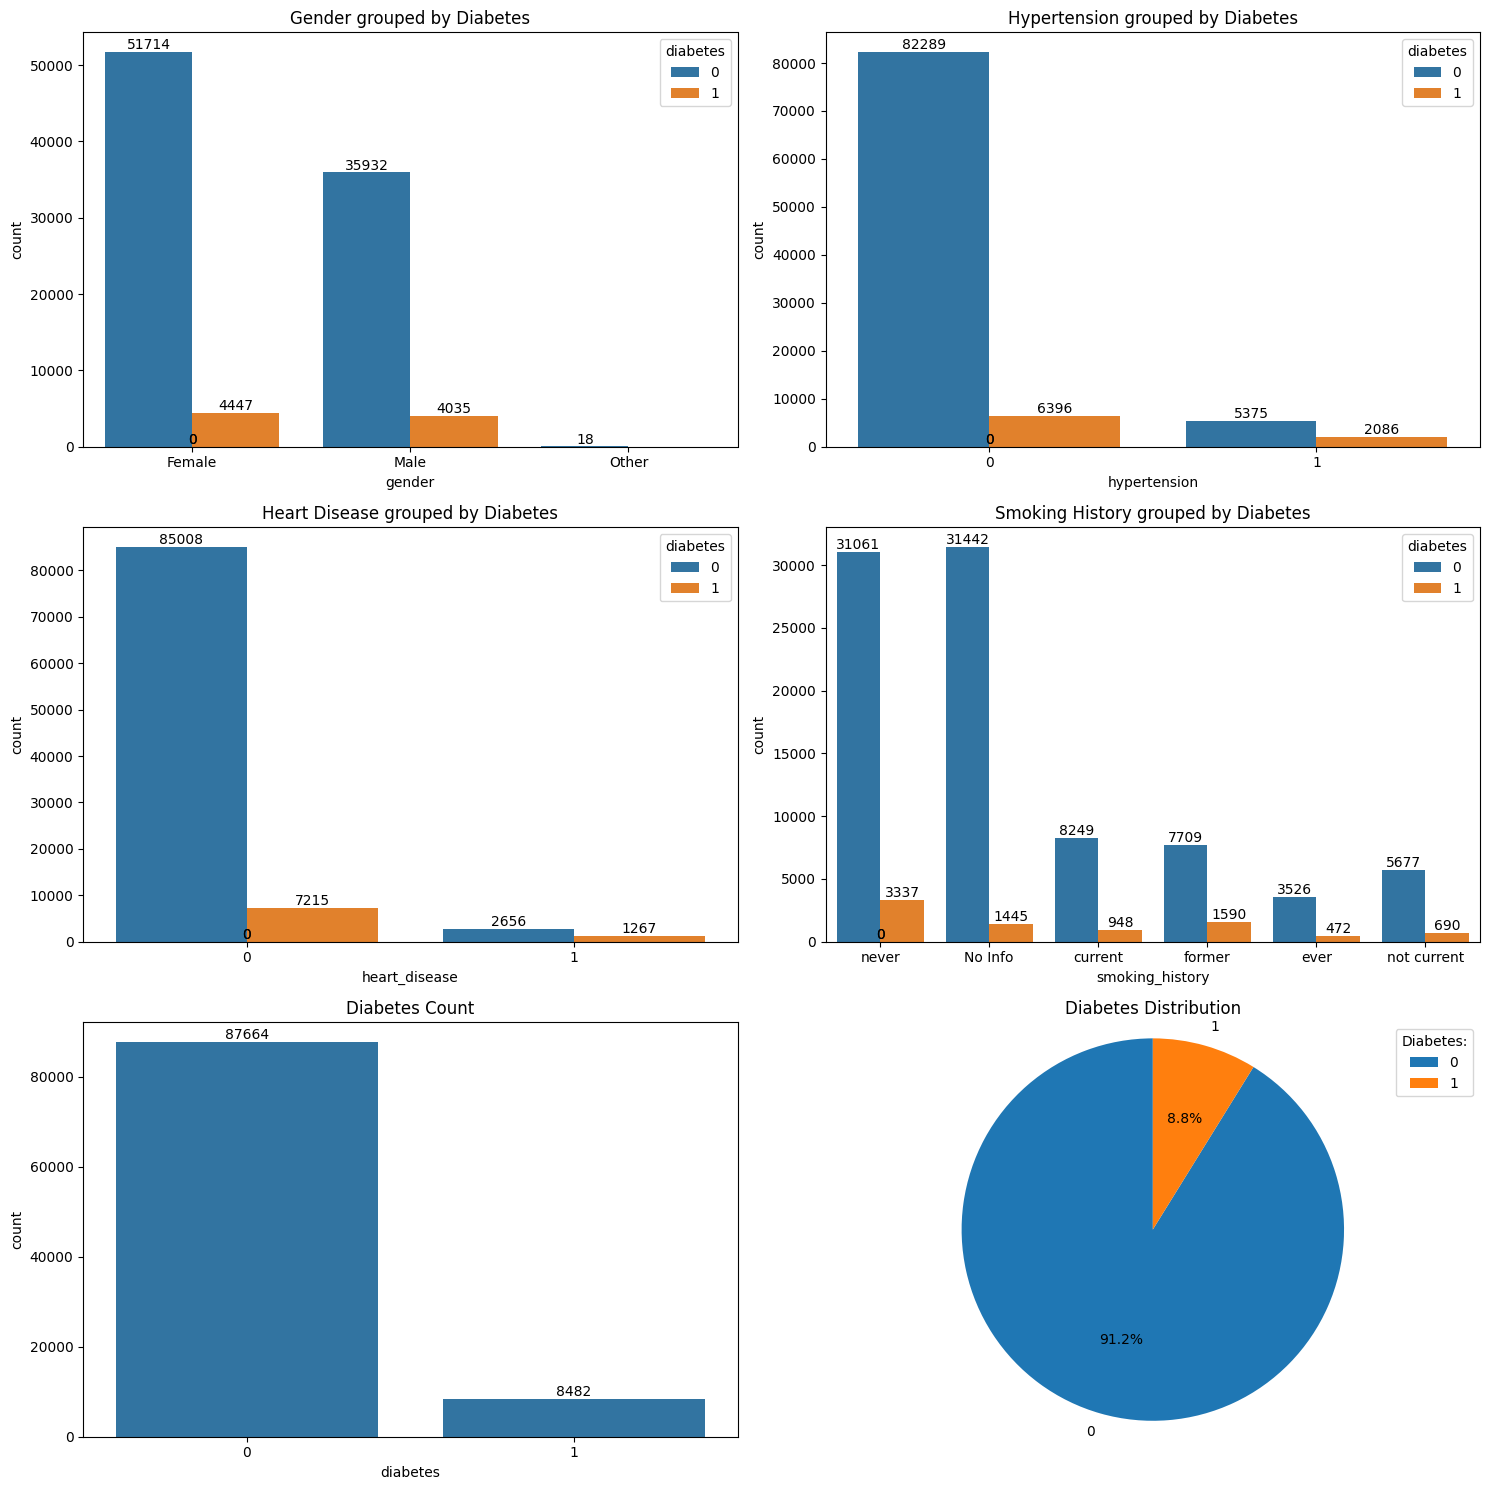

In [11]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)


# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()


# Show the plots
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

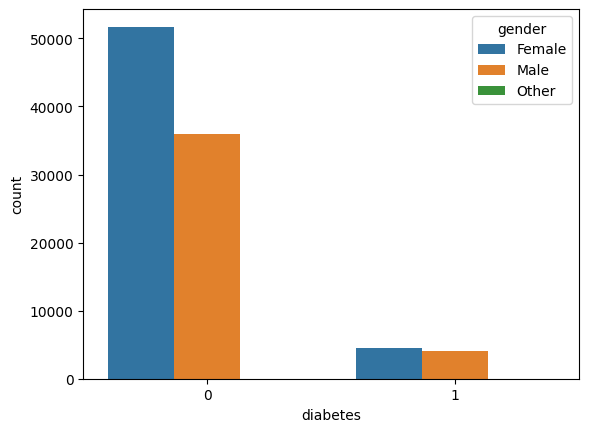

In [12]:
sns.countplot(x= 'diabetes', hue = 'gender', data = df)

<Axes: xlabel='diabetes', ylabel='count'>

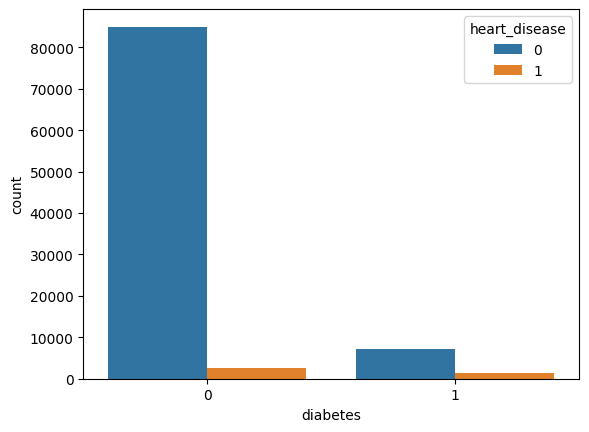

In [13]:
sns.countplot(x = 'diabetes', hue = 'heart_disease', data = df)

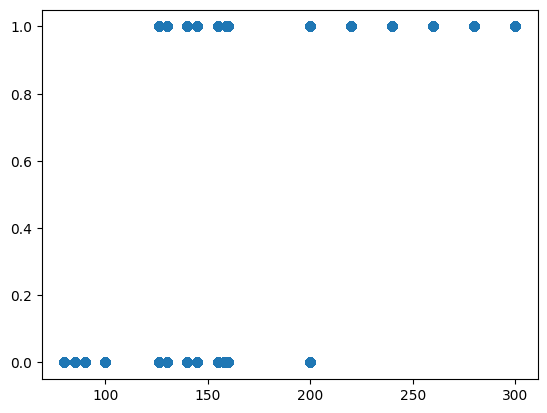

In [14]:
plt.scatter(y = 'diabetes', x= 'blood_glucose_level', data = df)
#logistic regression

In [15]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


<Axes: xlabel='smoking_history', ylabel='bmi'>

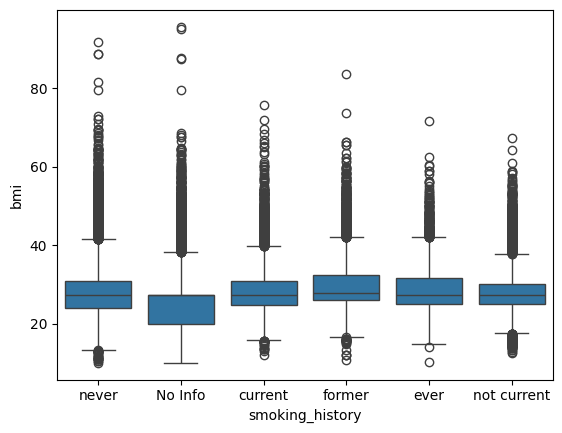

In [16]:
sns.boxplot(x = 'smoking_history' , y='bmi' , data = df)

<function matplotlib.pyplot.show(close=None, block=None)>

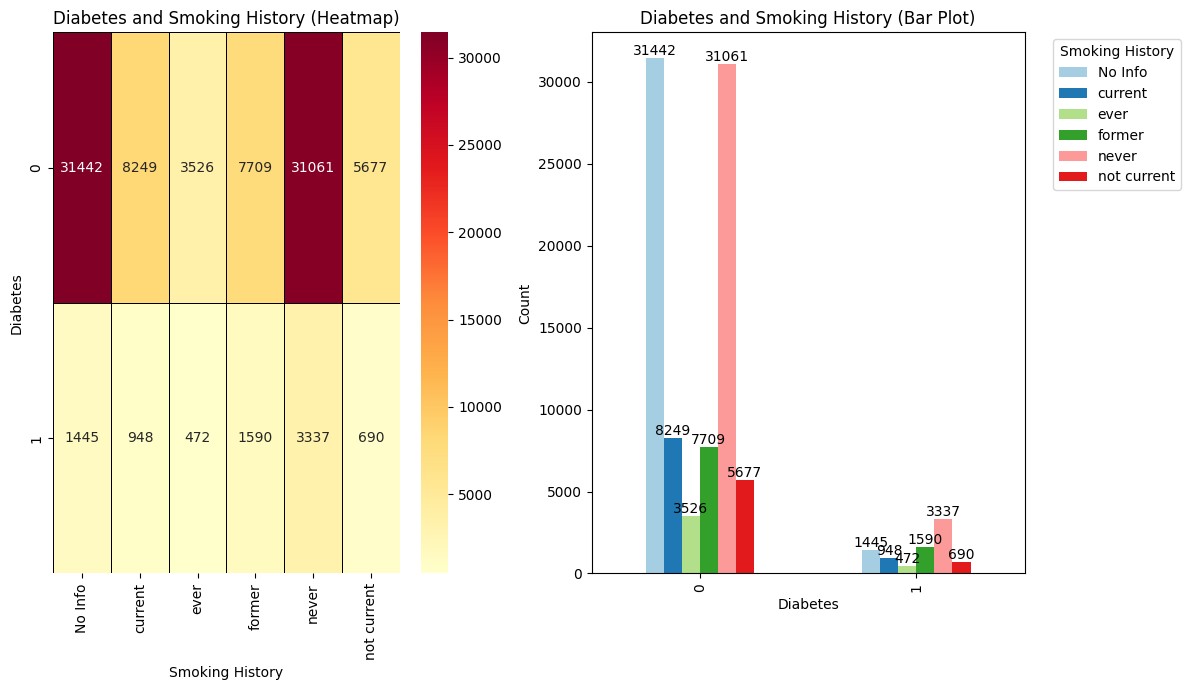

In [17]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

fig, ax = plt.subplots(1,2, figsize = (12,7))

sns.heatmap(cross_table, cmap = 'YlOrRd', annot = True, fmt = 'd',
            linewidths = 0.5, linecolor = 'black', ax = ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

cross_table.plot( kind = 'bar', stacked = False, ax = ax[1], color = plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title = 'Smoking History', bbox_to_anchor= (1.05, 1), loc = 'upper left')

for container in ax[1].containers:
  ax[1].bar_label(container)

plt.tight_layout()
plt.show

In [18]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female
age,80.0,54.0,28.0,36.0,76.0,20.0,44.0,79.0,42.0,32.0
hypertension,0,0,0,0,1,0,0,0,0,0
heart_disease,1,0,0,0,1,0,0,0,0,0
smoking_history,never,No Info,never,current,current,never,never,No Info,never,never
bmi,25.19,27.32,27.32,23.45,20.14,27.32,19.31,23.86,33.64,27.32
HbA1c_level,6.6,6.6,5.7,5.0,4.8,6.6,6.5,5.7,4.8,5.0
blood_glucose_level,140,80,158,155,155,85,200,85,145,100
diabetes,0,0,0,0,0,0,1,0,0,0


### **Cleaning Data**

In [19]:
df[df['gender'] == 'Other'].count()

gender                 18
age                    18
hypertension           18
heart_disease          18
smoking_history        18
bmi                    18
HbA1c_level            18
blood_glucose_level    18
diabetes               18
dtype: int64

In [20]:
len(df)

96146

In [21]:
(df[df['gender'] == 'Other'].count() / df['gender'].count() )*100
#how much percentage of the Other gender takes up from the dataframe

gender                 0.018722
age                    0.018722
hypertension           0.018722
heart_disease          0.018722
smoking_history        0.018722
bmi                    0.018722
HbA1c_level            0.018722
blood_glucose_level    0.018722
diabetes               0.018722
dtype: float64

In [22]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
#lets drop the 'Other' gender in model

In [23]:
len(df)

96128

In [24]:
#first of all we have gender to get dummies to
pd.get_dummies(df['gender'], drop_first = True)

,Male
0,False
1,False
2,True
3,False
4,True
...,...
99994,False
99996,False
99997,True
99998,False


In [25]:
df = pd.concat([df, pd.get_dummies(df['gender'], drop_first=True)], axis = 1 )
#adding gender dummies to original frame

In [26]:
df.drop('gender', axis = 1, inplace = True)

In [27]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Male
0,80.0,0,1,never,25.19,6.6,140,0,False
1,54.0,0,0,No Info,27.32,6.6,80,0,False
2,28.0,0,0,never,27.32,5.7,158,0,True
3,36.0,0,0,current,23.45,5.0,155,0,False
4,76.0,1,1,current,20.14,4.8,155,0,True
...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,No Info,24.60,4.8,145,0,False
99996,2.0,0,0,No Info,17.37,6.5,100,0,False
99997,66.0,0,0,former,27.83,5.7,155,0,True
99998,24.0,0,0,never,35.42,4.0,100,0,False


In [28]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [29]:
( len( df[df['smoking_history'] == 'No Info'] ) / len( df['smoking_history'] ) ) * 100
#how much percentage of the No Info takes up from the dataframe

34.2054344207723

<Axes: xlabel='smoking_history', ylabel='count'>

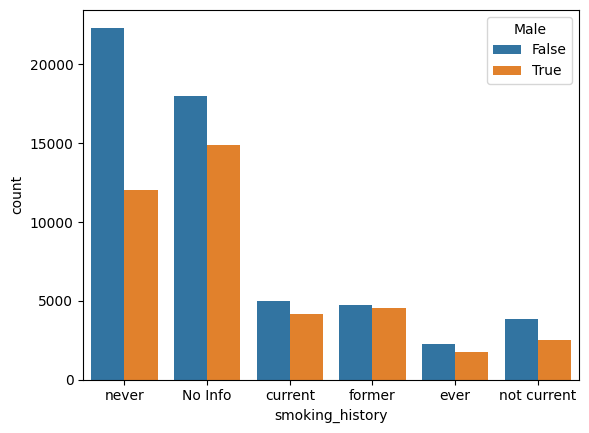

In [30]:
sns.countplot(x= 'smoking_history', hue = 'Male', data = df)
#males are always having more

In [31]:
#lets drop no info
df.drop(df[df['smoking_history'] == 'No Info'].index, inplace = True)

In [32]:
df['smoking_history'].unique()

array(['never', 'current', 'former', 'ever', 'not current'], dtype=object)

In [33]:
# i want to add ever to never
#and i want to add not current to former
#             'old value' : 'new value'
new_data = { "ever":"never",
            "not current":"former",
             'current': 'current',
             'former': 'former',
             'never': 'never'}

df['smoking_history'] = df['smoking_history'].map(new_data)

In [34]:
df['smoking_history'].unique()

array(['never', 'current', 'former'], dtype=object)

In [35]:
df.head(10)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Male
0,80.0,0,1,never,25.19,6.6,140,0,False
2,28.0,0,0,never,27.32,5.7,158,0,True
3,36.0,0,0,current,23.45,5.0,155,0,False
4,76.0,1,1,current,20.14,4.8,155,0,True
5,20.0,0,0,never,27.32,6.6,85,0,False
6,44.0,0,0,never,19.31,6.5,200,1,False
8,42.0,0,0,never,33.64,4.8,145,0,True
9,32.0,0,0,never,27.32,5.0,100,0,False
10,53.0,0,0,never,27.32,6.1,85,0,False
11,54.0,0,0,former,54.70,6.0,100,0,False


<Axes: xlabel='smoking_history', ylabel='count'>

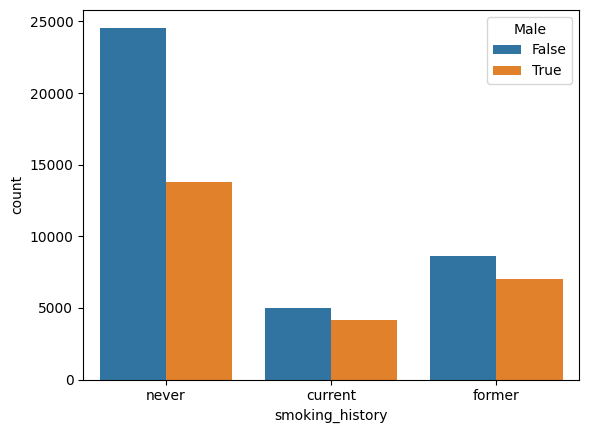

In [36]:
sns.countplot(x= 'smoking_history', hue = 'Male', data = df)

In [37]:
#to change it to numbers
#             'old value' : 'new value'
new_data = { "never":0,
            "current":1,
             'former': 2}

df['smoking_history'] = df['smoking_history'].map(new_data)

In [38]:
df['smoking_history'].unique()

array([0, 1, 2])

In [39]:
df.head(10)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Male
0,80.0,0,1,0,25.19,6.6,140,0,False
2,28.0,0,0,0,27.32,5.7,158,0,True
3,36.0,0,0,1,23.45,5.0,155,0,False
4,76.0,1,1,1,20.14,4.8,155,0,True
5,20.0,0,0,0,27.32,6.6,85,0,False
6,44.0,0,0,0,19.31,6.5,200,1,False
8,42.0,0,0,0,33.64,4.8,145,0,True
9,32.0,0,0,0,27.32,5.0,100,0,False
10,53.0,0,0,0,27.32,6.1,85,0,False
11,54.0,0,0,2,54.70,6.0,100,0,False


### **Logistic Regression**

In [40]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

### **Evaluating**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
# for accuracy , precision, recall
print(confusion_matrix(y_test, predictions))
#to calculate specific value

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     16872
           1       0.83      0.62      0.71      2103

    accuracy                           0.94     18975
   macro avg       0.89      0.80      0.84     18975
weighted avg       0.94      0.94      0.94     18975

[[16603   269]
 [  807  1296]]
